In [121]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf

# Loading the data

In [122]:
data = pd.read_csv("./data/data.csv")
data.drop(columns=["Unnamed: 0"],inplace=True)
data.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,3.688879,State-gov,11.258253,Bachelors,1.135322,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,-0.035080,United-States,<=50K
1,3.931826,Self-emp-not-inc,11.330348,Bachelors,1.135322,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.227904,United-States,<=50K
2,3.663562,Private,12.281398,HS-grad,-0.419772,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035080,United-States,<=50K
3,3.988984,Private,12.366157,11th,-1.197318,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035080,United-States,<=50K
4,3.367296,Private,12.732013,Bachelors,1.135322,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035080,Cuba,<=50K


In [123]:
final_df_training = pd.read_csv("./data/final_df_training.csv",index_col="Unnamed: 0")
final_df_training.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Income
0,3.688879,5,11.258253,9,1.135322,4,0,1,4,1,7.684784,0.0,-0.035080,0
1,3.931826,4,11.330348,9,1.135322,2,3,0,4,1,0.000000,0.0,-2.227904,0
2,3.663562,2,12.281398,11,-0.419772,0,5,1,4,1,0.000000,0.0,-0.035080,0
3,3.988984,2,12.366157,1,-1.197318,2,5,0,2,1,0.000000,0.0,-0.035080,0
4,3.367296,2,12.732013,9,1.135322,2,9,5,2,0,0.000000,0.0,-0.035080,0


In [124]:
final_df_prediction = pd.read_csv("./data/final_df_prediction.csv",index_col="Unnamed: 0")
final_df_prediction.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time
5000,3.871201,3,11.285121,14,1.912869,0,9,1,4,1,10.233834,0.000000,0.777077
5001,4.025352,2,11.928176,9,1.135322,4,12,2,4,0,0.000000,7.372118,-0.197511
5002,3.295837,2,11.795560,11,-0.419772,2,3,5,4,0,8.519989,0.000000,-0.035080
5003,3.367296,2,11.993343,11,-0.419772,4,6,4,4,0,0.000000,0.000000,-0.035080
5004,3.610918,2,11.040471,11,-0.419772,2,2,0,2,1,0.000000,0.000000,-0.035080


In [125]:
print(len(data))
print(len(final_df_training))
print(len(final_df_prediction))

30000
5000
25000


In [126]:
# Creating an evaluation function that prints evaluation metrics for provided target feature and predicted feature

def evaluation(test_y:np.ndarray,pred_y:np.ndarray):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

    print(f"Accuracy Score : {np.round(accuracy_score(test_y,pred_y)*100,2)}%")
    print(f"Recall Score : {np.round(recall_score(test_y,pred_y)*100,2)}%")
    print(f"Precision Score : {np.round(precision_score(test_y,pred_y)*100,2)}%")
    print(f"F1 Score : {np.round(f1_score(test_y,pred_y)*100,2)}%")

    print("\n")

    cm = confusion_matrix(test_y, pred_y)

    print(f"Confusion Matrix : \n{cm}")

In [127]:
X = final_df_training.drop(columns=['Income'],axis=1)
y = final_df_training["Income"]

In [128]:
# Performing a train test split with 20% of the data being held out for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)

In [129]:
X_train[0:5]

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time
3413,3.555348,2,12.739465,9,1.135322,2,11,0,4,1,8.895493,0.0,1.589234
1610,4.077537,4,12.262207,2,-0.808545,0,11,1,4,0,0.000000,0.0,0.939509
3459,3.091042,7,12.784855,11,-0.419772,4,14,4,4,0,0.000000,0.0,-0.035080
4293,3.526361,2,12.238119,15,-0.030998,0,9,1,4,1,0.000000,0.0,-0.035080
1039,3.555348,7,12.009510,1,-1.197318,2,14,5,4,0,0.000000,0.0,-2.633982


# Logistic Regression

In [130]:
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)
evaluation(y_test,y_pred)

Accuracy Score : 79.8%
Recall Score : 39.59%
Precision Score : 64.24%
F1 Score : 48.99%


Confusion Matrix : 
[[701  54]
 [148  97]]


c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
y_pred_wo_income_LR = LR.predict(final_df_prediction)

Income
 <=50K    21002
 >50K      3998
dtype: int64


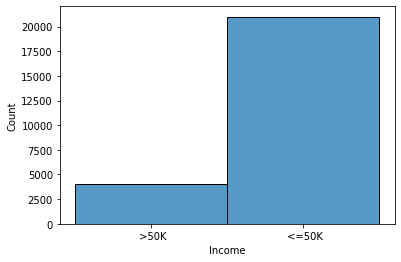

In [132]:
print(pd.DataFrame(y_pred_wo_income_LR,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_LR,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"]);

## Tuning the LR model

In [133]:
clf_LR = LogisticRegression()
params_LR = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'saga'],
    'max_iter': [100,200,300,500]
    # 'multi_class': ['auto', 'ovr', 'multinomial']
}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Fit the classifier
    
    grid_search_LR = GridSearchCV(clf_LR,params_LR);
    grid_search_LR.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_LR.best_params_)
print("Best Score:", grid_search_LR.best_score_)

best_model_LR = grid_search_LR.best_estimator_

y_pred_LR2 = best_model_LR.predict(X_test)
evaluation(y_test,y_pred_LR2)

Best Hyperparameters: {'C': 0.1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8145
Accuracy Score : 79.8%
Recall Score : 38.37%
Precision Score : 64.83%
F1 Score : 48.21%


Confusion Matrix : 
[[704  51]
 [151  94]]


In [134]:
LR2 = LogisticRegression(penalty="l2",solver="saga",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaluation(y_test,y_pred_LR2)

Accuracy Score : 80.3%
Recall Score : 40.41%
Precision Score : 66.0%
F1 Score : 50.13%


Confusion Matrix : 
[[704  51]
 [146  99]]


c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Income
 <=50K    21002
 >50K      3998
dtype: int64


Income
 <=50K    21230
 >50K      3770
dtype: int64


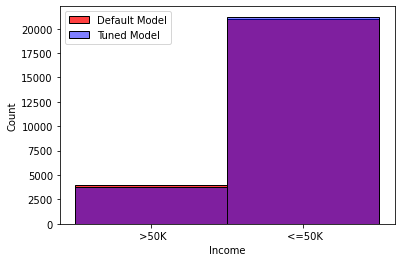

In [135]:
y_pred_wo_income_LR2 = best_model_LR.predict(final_df_prediction)

print(pd.DataFrame(y_pred_wo_income_LR,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_LR2,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_LR,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_LR2,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# Decision Trees


In [136]:
DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred_DT = DT.predict(X_test)
evaluation(y_test,y_pred_DT)

Accuracy Score : 79.9%
Recall Score : 57.96%
Precision Score : 59.17%
F1 Score : 58.56%


Confusion Matrix : 
[[657  98]
 [103 142]]


Income
 <=50K    18690
 >50K      6310
dtype: int64


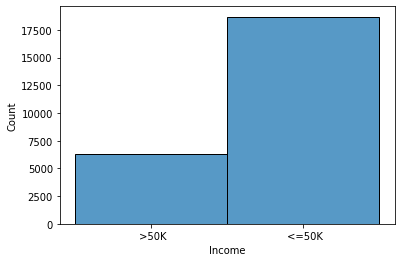

In [137]:
y_pred_wo_income_DT = DT.predict(final_df_prediction)

print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"]);

## Tuning the DT model

In [138]:
clf_DT = DecisionTreeClassifier()

params_DT = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search_DT = GridSearchCV(clf_DT,params_DT);
grid_search_DT.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_DT.best_params_)
print("Best Score:", grid_search_DT.best_score_)

best_model_DT = grid_search_DT.best_estimator_

y_pred_DT2 = best_model_DT.predict(X_test)
evaluation(y_test,y_pred_DT2)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.8432499999999999
Accuracy Score : 81.9%
Recall Score : 41.22%
Precision Score : 73.19%
F1 Score : 52.74%


Confusion Matrix : 
[[718  37]
 [144 101]]


Income
 <=50K    18690
 >50K      6310
dtype: int64


Income
 <=50K    21384
 >50K      3616
dtype: int64


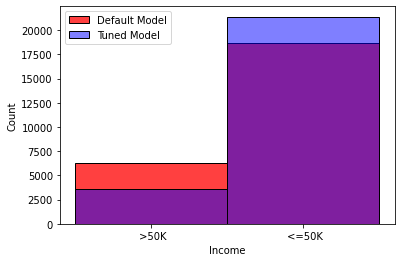

In [139]:
y_pred_wo_income_DT2 = best_model_DT.predict(final_df_prediction)

print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# Random Forest

In [140]:
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)
evaluation(y_test,y_pred_RF)

Accuracy Score : 83.8%
Recall Score : 55.92%
Precision Score : 71.73%
F1 Score : 62.84%


Confusion Matrix : 
[[701  54]
 [108 137]]


Income
 <=50K    20047
 >50K      4953
dtype: int64


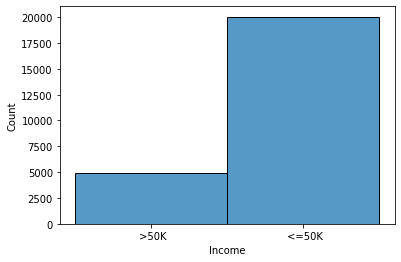

In [141]:
y_pred_wo_income_RF = RF.predict(final_df_prediction)

print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"]);

## Tuning RandomForest

In [142]:
clf_RF = RandomForestClassifier()
params_RF = {
    'n_estimators': [50,100,300],
    'criterion': ["gini","entropy"],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_RF = GridSearchCV(clf_RF,params_RF)
grid_search_RF.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)

best_model_RF = grid_search_RF.best_estimator_

y_pred_RF2 = best_model_RF.predict(X_test)
evaluation(y_test,y_pred_RF2)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8552499999999998
Accuracy Score : 83.9%
Recall Score : 55.92%
Precision Score : 72.11%
F1 Score : 62.99%


Confusion Matrix : 
[[702  53]
 [108 137]]


In [143]:
cv_scores = cross_val_score(best_model_RF, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Results (Accuracy):")
print(cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

Cross-Validation Results (Accuracy):
[0.86    0.8475  0.855   0.8375  0.85875]
Mean Accuracy: 0.85
Standard Deviation: 0.01


Income
 <=50K    20047
 >50K      4953
dtype: int64


Income
 <=50K    20140
 >50K      4860
dtype: int64


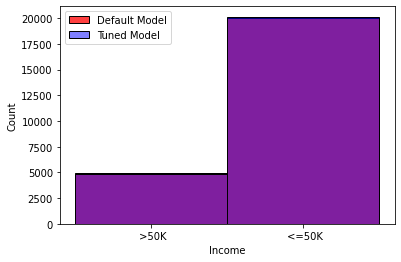

In [144]:
y_pred_wo_income_RF2 = best_model_RF.predict(final_df_prediction)

print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({0:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# Neural Network

In [145]:
X_train.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time
3413,3.555348,2,12.739465,9,1.135322,2,11,0,4,1,8.895493,0.0,1.589234
1610,4.077537,4,12.262207,2,-0.808545,0,11,1,4,0,0.000000,0.0,0.939509
3459,3.091042,7,12.784855,11,-0.419772,4,14,4,4,0,0.000000,0.0,-0.035080
4293,3.526361,2,12.238119,15,-0.030998,0,9,1,4,1,0.000000,0.0,-0.035080
1039,3.555348,7,12.009510,1,-1.197318,2,14,5,4,0,0.000000,0.0,-2.633982


In [146]:
y_train.head()

3413    1
1610    0
3459    0
4293    0
1039    0
Name: Income, dtype: int64

In [147]:
X_train_nn = X_train.to_numpy()
# y_train_nn = tf.keras.utils.to_categorical(y_train.replace({-1:2,1:1}))
y_train_nn = y_train.to_numpy()

In [148]:
X_train_nn[0:5]

array([[ 3.55534806,  2.        , 12.73946472,  9.        ,  1.13532183,
         2.        , 11.        ,  0.        ,  4.        ,  1.        ,
         8.89549263,  0.        ,  1.5892344 ],
       [ 4.07753744,  4.        , 12.2622072 ,  2.        , -0.80854488,
         0.        , 11.        ,  1.        ,  4.        ,  0.        ,
         0.        ,  0.        ,  0.93950873],
       [ 3.09104245,  7.        , 12.784855  , 11.        , -0.41977154,
         4.        , 14.        ,  4.        ,  4.        ,  0.        ,
         0.        ,  0.        , -0.03507977],
       [ 3.52636052,  2.        , 12.23811864, 15.        , -0.03099819,
         0.        ,  9.        ,  1.        ,  4.        ,  1.        ,
         0.        ,  0.        , -0.03507977],
       [ 3.55534806,  7.        , 12.00951017,  1.        , -1.19731822,
         2.        , 14.        ,  5.        ,  4.        ,  0.        ,
         0.        ,  0.        , -2.63398245]])

In [149]:
y_train_nn[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [150]:
print(X_train_nn.shape)
print(y_train_nn.shape)

(4000, 13)
(4000,)


In [151]:
model = Sequential()

model.add(tf.keras.Input(X_train_nn.shape[1]))
model.add(Dense(64,activation='relu',input_shape = (13,)))
model.add(Dense(32,activation='relu',input_shape = (64,)))
model.add(Dense(1,activation="sigmoid",input_shape = (32,)))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [152]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.fit(X_train_nn,y_train_nn,epochs=30,batch_size=4)

Epoch 1/30


1000/1000 [==============================] - 2s 1ms/step - loss: 0.4405 - accuracy: 0.8008
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4032 - accuracy: 0.8155
Epoch 3/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8202
Epoch 4/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3721 - accuracy: 0.8207
Epoch 5/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3603 - accuracy: 0.8270
Epoch 6/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8267
Epoch 7/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3553 - accuracy: 0.8270
Epoch 8/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3520 - accuracy: 0.8303
Epoch 9/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3477 - accuracy: 0.8303
Epoch 10/30
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3459 - accurac

In [154]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8130
Test Loss: 0.3859
Test Accuracy: 81.30%


In [155]:
from sklearn.metrics import classification_report

In [156]:
X_test.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time
1718,3.583519,2,10.321606,9,1.135322,2,11,0,4,1,0.0,0.0,0.370999
2511,4.262680,2,12.477420,15,-0.030998,4,0,1,4,0,0.0,0.0,-2.796414
345,3.784190,4,12.396263,9,1.135322,4,11,1,4,1,0.0,0.0,0.127352
2521,4.007333,7,12.042294,12,1.524095,4,14,1,4,0,0.0,0.0,-0.035080
54,3.871201,3,11.606716,11,-0.419772,0,3,1,4,1,0.0,0.0,1.589234


In [157]:
y_test.head()

1718    1
2511    0
345     0
2521    0
54      0
Name: Income, dtype: int64

In [158]:
y_test.to_numpy()

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [159]:
prediction = model.predict(X_test.to_numpy())
print(classification_report(y_test.to_numpy(),np.round(prediction)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       755
           1       0.63      0.56      0.59       245

    accuracy                           0.81      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.81      0.81      0.81      1000



In [160]:
predict_incomes = model.predict(final_df_prediction)
np.round(np.max(predict_incomes,axis=1))

array([1., 0., 1., ..., 0., 0., 0.], dtype=float32)

 <=50K    19611
 >50K      5389
dtype: int64


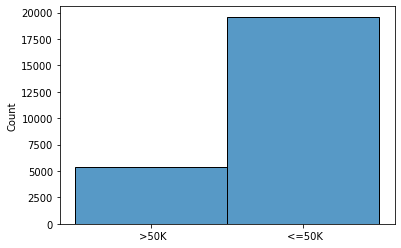

In [161]:
sns.histplot(pd.Series(np.round(np.max(predict_incomes,axis=1))).replace({1.:" >50K",0.: " <=50K"}));
print(pd.Series(np.round(np.max(predict_incomes,axis=1))).replace({1.:" >50K",0.: " <=50K"}).value_counts())

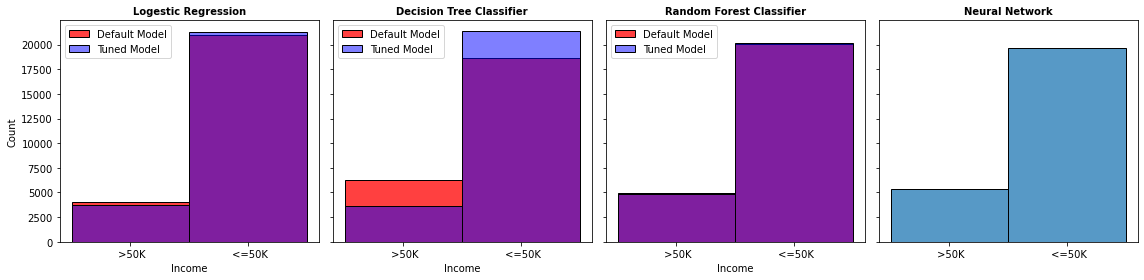

In [162]:
fig,axes = plt.subplots(nrows=1,ncols=4,sharey=True,figsize=(16,4))

sns.histplot(pd.DataFrame(y_pred_wo_income_LR,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model",ax=axes[0]);
sns.histplot(pd.DataFrame(y_pred_wo_income_LR2,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model",ax=axes[0]);
axes[0].legend(loc="best");
axes[0].set_title("Logestic Regression",fontsize=10,fontweight='bold');

sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model",ax=axes[1]);
sns.histplot(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model",ax=axes[1]);
axes[1].legend(loc="best");
axes[1].set_title("Decision Tree Classifier",fontsize=10,fontweight='bold');

sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model",ax=axes[2]);
sns.histplot(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({0:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model",ax=axes[2]);
axes[2].legend(loc="best");
axes[2].set_title("Random Forest Classifier",fontsize=10,fontweight='bold');

sns.histplot(pd.Series(np.round(np.max(predict_incomes,axis=1))).replace({1.:" >50K",0.: " <=50K"}),ax=axes[3]);
axes[3].set_title("Neural Network",fontsize=10,fontweight='bold');

plt.tight_layout()